In [ ]:
import pandas as pd

# Jika file CSV
df = pd.read_excel('label.xlsx')
# Mengubah nama kolom
df.columns = ['timestamp', 'username', 'comment', 'likeCount', 'label']
# Tampilkan data untuk melihat kolom-kolomnya
df.head()


,timestamp,username,comment,likeCount,label
0,2019-10-11T15:12:40Z,@MenjadiManusia,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",2506,netral
1,2019-10-11T17:47:05Z,@sandiikin,Manungsa = Manunggaling Rasa,26,netral
2,2019-10-12T01:58:29Z,@staypray8954,Tertata sekali... 💚💚💚,15,empati
3,2019-10-12T04:15:43Z,@dinipraba7035,kalau adhd bukan gangguan mental yah?,6,netral
4,2019-10-12T04:20:53Z,@staypray8954,@@dinipraba7035 lebih baik konsul sama pakarny...,8,netral


# **EDA**

## information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  1500 non-null   object
 1   username   1500 non-null   object
 2   comment    1500 non-null   object
 3   likeCount  1500 non-null   int64 
 4   label      1500 non-null   object
dtypes: int64(1), object(4)
memory usage: 58.7+ KB


In [ ]:
df.describe()

,likeCount
count,1500.000000
mean,6.568667
std,85.002421
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2506.000000


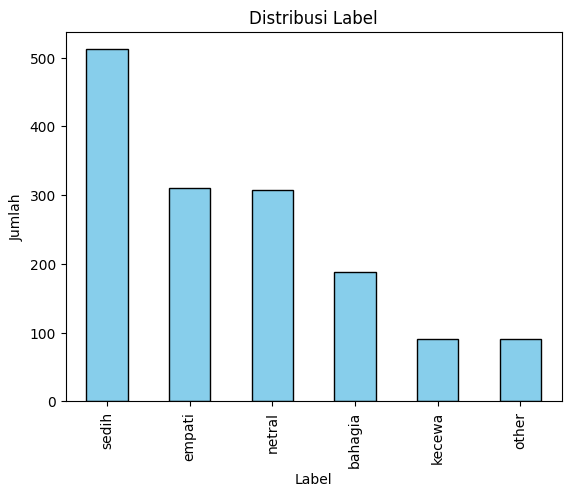

In [ ]:
import matplotlib.pyplot as plt

# Membuat bar plot untuk distribusi label
label_distribution = df['label'].value_counts()

# Membuat plot
label_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan judul dan label
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')

# Menampilkan grafik
plt.show()

## check missing value & duplicate

In [ ]:
df.isnull().sum()

,0
timestamp,0
username,0
comment,0
likeCount,0
label,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
# Menampilkan semua baris yang duplikat berdasarkan seluruh kolom
duplicates = df[df.duplicated(keep=False)]
print(duplicates)


                timestamp              username  \
227  2022-03-01T05:33:23Z  @firdhaprblsmnaa1159   
229  2022-03-01T05:33:23Z  @firdhaprblsmnaa1159   

                                               comment  likeCount  label  
227  Ketakutan sm kuliah apa itu wajar? Semua badan...          1  sedih  
229  Ketakutan sm kuliah apa itu wajar? Semua badan...          1  sedih  


In [ ]:
# Menghapus baris duplikat berdasarkan semua kolom
df = df.drop_duplicates()

# **Preprocessing**

## data cleaning & lowercase

In [ ]:
#menghapus kolom yang tidak relevan untuk dilakukan klasifikasi
drop_columns = ['timestamp', 'username','likeCount']
df = df.drop(columns=drop_columns)

In [ ]:
# Menampilkan baris yang memiliki tipe 'int' di kolom 'comment'
int_rows = df[df['comment'].apply(lambda x: isinstance(x, int))]
print(int_rows)


    comment  label
354       0  other
414       0  other


In [ ]:
df['comment'] = df['comment'].apply(lambda x: str(x) if x is not None else '')

In [ ]:
import re
import html

# Fungsi untuk menghapus tag HTML menggunakan regex
def remove_html_tags(text):
    text = html.unescape(text)  # Mengonversi entitas HTML ke karakter asli
    clean_text = re.sub(r'<.*?>', '', text)  # Regex untuk menghapus semua tag HTML
    return clean_text

df['comment_rmv_html'] = df['comment'].apply(remove_html_tags)
df.head(5)

,comment,label,comment_rmv_html
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese..."
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...


In [ ]:
# import pandas as pd
# import re

# # Fungsi untuk mendeteksi emotikon
# def detect_emoticons(text):
#     # Regex untuk menemukan emotikon yang terdiri dari karakter non-alfabet (emoji)
#     emoticon_pattern = r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]'

#     # Mencari semua emotikon dalam teks
#     emoticons = re.findall(emoticon_pattern, text)

#     return emoticons


# # Terapkan fungsi detect_emoticons ke setiap baris teks dalam DataFrame
# df['emoticons'] = df['comment_rmv_html'].apply(detect_emoticons)

# # Gabungkan semua emotikon dari setiap baris menjadi satu list
# all_emoticons = sum(df['emoticons'], [])

# # Dapatkan hanya emotikon unik
# unique_emoticons = set(all_emoticons)

# # Tampilkan hasil
# print("Unique Emoticons:", unique_emoticons)


In [ ]:
# Mapping emotikon ke teks
emoticon_map = {
    "💛": "kasih sayang", "🖤": "kasih sayang", "💖": "kasih sayang", "❤": "kasih sayang", "💕": "kasih sayang",
    "💙": "kasih sayang", "❣": "kasih sayang", "♥": "kasih sayang", "💞": "kasih sayang", "💗": "kasih sayang",
    "💚": "kasih sayang", "🤍": "kasih sayang", "💜": "kasih sayang", "🥰": "kasih sayang", "🤞": "kasih sayang",
    "🤗": "kasih sayang", "😘": "kasih sayang",

    "🙏": "terima kasih",

    "😓": "sedih", "🙁": "sedih", "😔": "sedih", "😣": "sedih", "😞": "sedih", "😭": "sedih", "☹": "sedih",
    "😩": "sedih", "😢": "sedih", "😫": "sedih", "😖": "sedih", "😕": "sedih", "🤧": "sedih", "😥": "sedih",
    "😪": "sedih", "🤕": "sedih",

    "🦾": "semangat", "💪": "semangat", "🔥": "semangat", "😉": "semangat", "⭐": "semangat", "🙌": "semangat",
    "🤝": "semangat",

    "😀": "bahagia", "😊": "bahagia", "😍": "bahagia", "😆": "bahagia", "🌻": "bahagia", "✨": "bahagia",
    "😇": "bahagia", "😁": "bahagia", "😗": "bahagia", "😚": "bahagia", "🌹": "bahagia", "👼": "bahagia",
    "🤭": "bahagia", "✌": "bahagia",

    "😑": "tidak senang", "😒": "tidak senang", "🙃": "tidak senang", "🙂": "tidak senang", "🥴": "tidak senang",

    "👍": "setuju",

    "🥺": "memohon",

    "😠": "marah", "😈": "marah",

    "💔": "sakit hati",

    "🤣": "tertawa", "😂": "tertawa", "😅": "tertawa",

    "😶": "terdiam",

    "👉": "menunjuk",

    "🤦": "kecewa",

    "🤲": "berdoa",

    "💡": "ide",

    "🍃": "tenang", "😌": "tenang",

    "👃": "penciuman",

    "🙉": "malu", "😬": "malu",

    # Simbol Teks
    ":)": "senang", ";)": "senang", ":(" : "sedih", ":-)": "senang", ";-)" : "berkedip", ":-(" : "sedih", ";(" : "sedih", ":')" : "sedih",
    ":D": "senang", ":P": "ceria", ":/": "bingung", ":'(": "sedih", ":|": "datar", "-_-": "datar"
}

# Fungsi untuk mengganti emotikon dengan teks dan menambahkan spasi
def replace_emoticons_with_text(text):
    for emoticon, replacement in emoticon_map.items():
        text = text.replace(emoticon, replacement + " ")  # Menambahkan spasi setelah teks
    return text

# Terapkan penggantian emotikon ke setiap komentar
df['comment_emoticon'] = df['comment_rmv_html'].apply(replace_emoticons_with_text)

# Tampilkan hasil
df.head()


,comment,label,comment_rmv_html,comment_emoticon
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese...","Ingat, kamu juga manusia.@0:58 Penjelasan kese..."
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa,Manungsa = Manunggaling Rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚,Tertata sekali... kasih sayang kasih sayang k...
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...,@@dinipraba7035 lebih baik konsul sama pakarny...


In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import re

# Fungsi untuk menghapus URL, mentions, hashtag, tanda baca, dan angka
def remove_noise(text):

    # Menghapus URL
    text = re.sub(r'http\S+|www\S+', '', text)

    # Menghapus mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Menghapus hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)

    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    # Menghapus angka
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # # Menghapus tanda baca (kecuali emoji)
    # # Mempertahankan emoji dan simbol Unicode
    # text = re.sub(r'[^\w\s\U00010000-\U0010FFFF]', '', text)

    # # Menghapus emotikon berbasis teks (misalnya :) :( ;P)
    # text = re.sub(r'[:;=8]([)D(\\]/|\\])|[-^]?[)D(\\]/|\\]', '', text)
    return text

# Terapkan pembersihan pada kolom 'tweet'
df['comment_clean'] = df['comment_emoticon'].apply(remove_noise)

# Tampilkan DataFrame yang sudah diproses
df


,comment,label,comment_rmv_html,comment_emoticon,comment_clean
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese...","Ingat, kamu juga manusia.@0:58 Penjelasan kese...",Ingat kamu juga manusia Penjelasan kesehatan m...
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa,Manungsa = Manunggaling Rasa,Manungsa Manunggaling Rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚,Tertata sekali... kasih sayang kasih sayang k...,Tertata sekali kasih sayang kasih sayang kasih...
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...,@@dinipraba7035 lebih baik konsul sama pakarny...,lebih baik konsul sama pakarnya psikiater ata...
...,...,...,...,...,...
1495,cure for your depression: stop using socmeds.....,bahagia,cure for your depression: stop using socmeds.....,cure for your depression: stop using socmeds.....,cure for your depression stop using socmedsnev...
1496,Menerima semua aspek kehidupan dan bertumbuh d...,empati,Menerima semua aspek kehidupan dan bertumbuh d...,Menerima semua aspek kehidupan dan bertumbuh d...,Menerima semua aspek kehidupan dan bertumbuh d...
1497,🖤🖤🖤,empati,🖤🖤🖤,kasih sayang kasih sayang kasih sayang,kasih sayang kasih sayang kasih sayang
1498,terima kasih terima kasih terima kasih,bahagia,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih


In [ ]:
# Mengecek berapa banyak baris yang kosong setelah pembersihan
empty_rows = df[df['comment_clean'] == '']
print(f"Jumlah baris kosong: {empty_rows.shape[0]}")


Jumlah baris kosong: 32


In [ ]:
# Menampilkan baris yang memiliki NaN atau string kosong di kolom 'comment_clean'
empty_rows = df[df['comment_clean'].isna() | (df['comment_clean'] == '')]

# Tampilkan hasil
empty_rows


,comment,label,comment_rmv_html,comment_emoticon,comment_clean
6,"<a href=""https://www.youtube.com/watch?v=LeFkk...",netral,1:02:20,1:02:20,
13,"<a href=""https://www.youtube.com/watch?v=LeFkk...",netral,20:38,20:38,
21,🫂,other,🫂,🫂,
23,;,other,;,;,
30,"<a href=""https://www.youtube.com/watch?v=LeFkk...",netral,20:00,20:00,
31,"<a href=""https://www.youtube.com/watch?v=LeFkk...",netral,08:04,08:04,
56,🥲,other,🥲,🥲,
73,.,other,.,.,
179,;,other,;,;,
214,;,other,;,;,


In [ ]:
def lowercase(text):
    return text.lower()

df['comment_clean'] = df['comment_clean'].apply(lowercase)

df

,comment,label,comment_rmv_html,comment_emoticon,comment_clean
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese...","Ingat, kamu juga manusia.@0:58 Penjelasan kese...",ingat kamu juga manusia penjelasan kesehatan m...
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa,Manungsa = Manunggaling Rasa,manungsa manunggaling rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚,Tertata sekali... kasih sayang kasih sayang k...,tertata sekali kasih sayang kasih sayang kasih...
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...,@@dinipraba7035 lebih baik konsul sama pakarny...,lebih baik konsul sama pakarnya psikiater ata...
...,...,...,...,...,...
1495,cure for your depression: stop using socmeds.....,bahagia,cure for your depression: stop using socmeds.....,cure for your depression: stop using socmeds.....,cure for your depression stop using socmedsnev...
1496,Menerima semua aspek kehidupan dan bertumbuh d...,empati,Menerima semua aspek kehidupan dan bertumbuh d...,Menerima semua aspek kehidupan dan bertumbuh d...,menerima semua aspek kehidupan dan bertumbuh d...
1497,🖤🖤🖤,empati,🖤🖤🖤,kasih sayang kasih sayang kasih sayang,kasih sayang kasih sayang kasih sayang
1498,terima kasih terima kasih terima kasih,bahagia,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih,terima kasih terima kasih terima kasih


## normalisasi

In [ ]:
import pandas as pd

# Membaca kamus alay dan kamus singkatan
kamus_singkatan = pd.read_csv('kamus_singkatan.csv')

# Menggabungkan kamus alay dan kamus singkatan menjadi satu kamus
kamus2 = kamus_singkatan.set_index('singkatan')['asli'].to_dict()


# Fungsi untuk normalisasi kata singkatan
def normalize_abbreviations(text):
    words = text.split()
    normalized_words = [kamus2[word.lower()] if word.lower() in kamus2 else word for word in words]
    return ' '.join(normalized_words)

# Menerapkan fungsi normalisasi ke kolom teks
df['comment_norm'] = df['comment_clean'].apply(normalize_abbreviations)

# Menampilkan 50 baris pertama setelah normalisasi
df.head()


,comment,label,comment_rmv_html,comment_emoticon,comment_clean,comment_norm
0,"Ingat, kamu juga manusia.<br><br><br>@<a href=...",netral,"Ingat, kamu juga manusia.@0:58 Penjelasan kese...","Ingat, kamu juga manusia.@0:58 Penjelasan kese...",ingat kamu juga manusia penjelasan kesehatan m...,ingat kamu juga manusia penjelasan kesehatan m...
1,Manungsa = Manunggaling Rasa,netral,Manungsa = Manunggaling Rasa,Manungsa = Manunggaling Rasa,manungsa manunggaling rasa,manungsa manunggaling rasa
2,Tertata sekali... 💚💚💚,empati,Tertata sekali... 💚💚💚,Tertata sekali... kasih sayang kasih sayang k...,tertata sekali kasih sayang kasih sayang kasih...,tertata sekali kasih sayang kasih sayang kasih...
3,kalau adhd bukan gangguan mental yah?,netral,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah?,kalau adhd bukan gangguan mental yah,kalau adhd bukan gangguan mental yah
4,@@dinipraba7035 lebih baik konsul sama pakarny...,netral,@@dinipraba7035 lebih baik konsul sama pakarny...,@@dinipraba7035 lebih baik konsul sama pakarny...,lebih baik konsul sama pakarnya psikiater ata...,lebih baik konsul sama pakarnya psikiater atau...


## translate

In [ ]:
!pip install langdetect
!pip install deep-translator

In [ ]:
from langdetect import detect
from deep_translator import GoogleTranslator

def translate_if_english(text):
    try:
        if detect(text) == 'en':  # hanya translate bahasa Inggris
            return GoogleTranslator(source='en', target='id').translate(text)
        else:
            return text
    except:
        return text

df['comment_translate'] = df['comment_norm'].apply(translate_if_english)

## tokenizing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

texts = df['comment_translate'].astype(str).tolist()

# 1️⃣ Tokenizer Keras
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# 2️⃣ Ubah teks → urutan indeks kata
sequences = tokenizer.texts_to_sequences(texts)

# 3️⃣ Padding
maxlen = 100
X = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

y = df['label']

# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Lihat mapping antara label asli dan numerik
print("Mapping Label Asli ke Angka:")
for i, label in enumerate(le.classes_):
    print(f"{i} = {label}")

# Contoh hasil sebelum & sesudah encoding
print("\nSebelum encoding:")
print(y.head())

print("\nSesudah encoding:")
print(y_encoded[:10])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)

# 1. Simpan X_train dan y_train
train_df = pd.DataFrame(X_train)   # setiap kolom = posisi token ke-1, ke-2, ...
train_df['label'] = y_train
train_df.to_csv('train_data.csv', index=False)

test_df = pd.DataFrame(X_test)
test_df['label'] = y_test
test_df.to_csv('test_data.csv', index=False)

Mapping Label Asli ke Angka:
0 = bahagia
1 = empati
2 = kecewa
3 = netral
4 = other
5 = sedih

Sebelum encoding:
0    netral
1    netral
2    empati
3    netral
4    netral
Name: label, dtype: object

Sesudah encoding:
[3 3 1 3 3 3 3 2 1 5]


# LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

num_classes = len(le.classes_)

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    LSTM(128),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 6. Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32
)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.2759 - loss: 1.7070 - val_accuracy: 0.3289 - val_loss: 1.6626
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3544 - loss: 1.6551 - val_accuracy: 0.3289 - val_loss: 1.6545
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.2988 - loss: 1.6552 - val_accuracy: 0.3289 - val_loss: 1.6516
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.3449 - loss: 1.6323 - val_accuracy: 0.3289 - val_loss: 1.6390
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3183 - loss: 1.6188 - val_accuracy: 0.3289 - val_loss: 1.8711
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3557 - loss: 1.7611 - val_accuracy: 0.3289 - val_loss: 1.6414
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3201 - loss: 1.6148 - val_accuracy: 0.3289 - val_loss: 1.6392
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3449 - loss: 1.5823 - val_accuracy: 0.3289 - val_loss: 1.

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 1. Prediksi di data test (probabilitas per kelas)
y_pred_proba = model.predict(X_test)

# 2. Ambil kelas dengan probabilitas tertinggi (argmax)
y_pred = np.argmax(y_pred_proba, axis=1)

# 3. Classification report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 4. Confusion matrix (angka)
cm = confusion_matrix(y_test, y_pred)
print("=== Confusion Matrix ===")
print(cm)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
=== Classification Report ===
              precision    recall  f1-score   support

     bahagia       0.00      0.00      0.00        49
      empati       1.00      0.01      0.02       110
      kecewa       0.00      0.00      0.00        34
      netral       0.20      0.78      0.32        80
       other       0.00      0.00      0.00        29
       sedih       0.52      0.50      0.51       148

    accuracy                           0.30       450
   macro avg       0.29      0.21      0.14       450
weighted avg       0.45      0.30      0.23       450

=== Confusion Matrix ===
[[ 0  0  0 43  0  6]
 [ 1  1  0 80  0 28]
 [ 0  0  0 20  0 14]
 [ 0  0  0 62  0 18]
 [ 0  0  0 28  0  1]
 [ 1  0  1 72  0 74]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


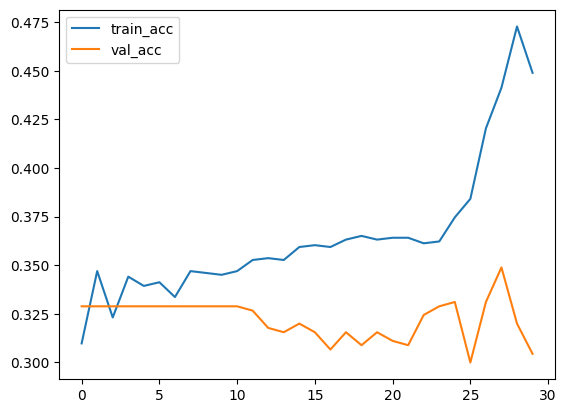

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# Eror analisis

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

# 1. Oversampling di data train yang SUDAH ada
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

print("Distribusi label di y_train sebelum oversampling:")
unique, counts = np.unique(y_train, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(le.inverse_transform([cls])[0], ":", cnt)

print("\nDistribusi label di y_train SETELAH oversampling:")
unique, counts = np.unique(y_train_over, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(le.inverse_transform([cls])[0], ":", cnt)

num_classes = len(le.classes_)

model_over = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    Bidirectional(LSTM(128)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_over.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Training model perbaikan
history_over = model_over.fit(
    X_train_over, y_train_over,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

# 4. Classification report & confusion matrix
y_pred_proba = model_over.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print("=== Classification Report (setelah oversampling) ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
print("=== Confusion Matrix ===")
print(cm)

Distribusi label di y_train sebelum oversampling:
bahagia : 139
empati : 201
kecewa : 57
netral : 227
other : 62
sedih : 363

Distribusi label di y_train SETELAH oversampling:
bahagia : 363
empati : 363
kecewa : 363
netral : 363
other : 363
sedih : 363


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.2357 - loss: 1.7596 - val_accuracy: 0.2311 - val_loss: 1.6626
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4406 - loss: 1.4083 - val_accuracy: 0.3711 - val_loss: 1.5090
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6791 - loss: 0.9298 - val_accuracy: 0.5400 - val_loss: 1.3208
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8368 - loss: 0.4979 - val_accuracy: 0.5267 - val_loss: 1.5259
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9052 - loss: 0.3224 - val_accuracy: 0.5600 - val_loss: 1.5563
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9434 - loss: 0.2521 - val_accuracy: 0.5800 - val_loss: 1.9833
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9571 - loss: 0.1628 - val_accuracy: 0.5467 - val_loss: 1.9524
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9656 - loss: 0.1423 - val_accuracy: 0.5711 - v